In [14]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

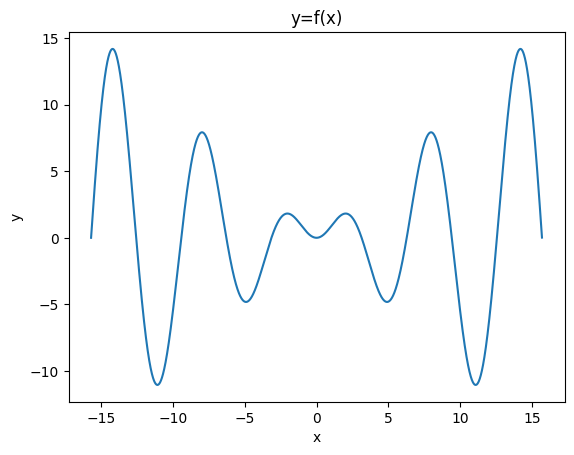

In [15]:
x = np.arange(-5 * np.pi, 5 * np.pi, 0.001)
y = x * np.sin(x)
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('y=f(x)')
plt.show()

In [16]:
x_train = np.arange(-5 * np.pi, 5 * np.pi, 0.001)
x_val = np.arange(1 * np.pi, 3 * np.pi, 0.001)
x_test = np.arange(3 * np.pi, 5 * np.pi, 0.001)
y_train = x_train * np.sin(x_train)
y_val = x_val * np.sin(x_val)
y_test = x_test * np.sin(x_test)

x_train = torch.Tensor(x_train)
x_val = torch.Tensor(x_val)
x_test = torch.Tensor(x_test)
y_train = torch.Tensor(y_train)
y_val = torch.Tensor(y_val)
y_test = torch.Tensor(y_test)


x_train = torch.unsqueeze(x_train, dim=1)
x_val = torch.unsqueeze(x_val, dim=1)
x_test = torch.unsqueeze(x_test, dim=1)
y_train = torch.unsqueeze(y_train, dim=1)
y_val = torch.unsqueeze(y_val, dim=1)
y_test = torch.unsqueeze(y_test, dim=1)

In [17]:
class myModel(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(myModel, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size1)
        self.relu1 = nn.ReLU()
        self.layer2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu2 = nn.ReLU()
        self.output_layer = nn.Linear(hidden_size2, output_size)
        
    def forward(self, x):
        x = self.layer1(x)
        x = self.relu1(x)
        x = self.layer2(x)
        x = self.relu2(x)
        x = self.output_layer(x)
        return x

In [18]:
input_size = 1
hidden_size1 = 256
hidden_size2 = 256
output_size = 1

In [19]:
model = myModel(input_size, hidden_size1, hidden_size2, output_size)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=2000, gamma=0.6)

In [20]:
for epoch in range(2000):
    model.train()
    logits = model(x_train)
    optimizer.zero_grad()
    loss = criterion(logits, y_train)
    loss.backward()
    optimizer.step()
    
    model.eval()
    logits = model(x_val)
    val_loss = criterion(logits, y_val)
    if epoch % 500 == 0:
        print('epoch', epoch, ': train loss', loss.detach().numpy(), ': val loss', val_loss.detach().numpy())
    # scheduler.step()

epoch 0 : train loss 40.9366 : val loss 17.448599
epoch 500 : train loss 20.47712 : val loss 14.919468
epoch 1000 : train loss 9.945829 : val loss 2.2677412
epoch 1500 : train loss 8.058222 : val loss 0.44233736


In [21]:
x = torch.Tensor(x)
x = torch.unsqueeze(x, dim=1)
y = torch.Tensor(y)
y = torch.unsqueeze(y, dim=1)
model.eval()
logits = model(x)
loss = criterion(logits, y)
print(loss.detach().numpy())

6.730562


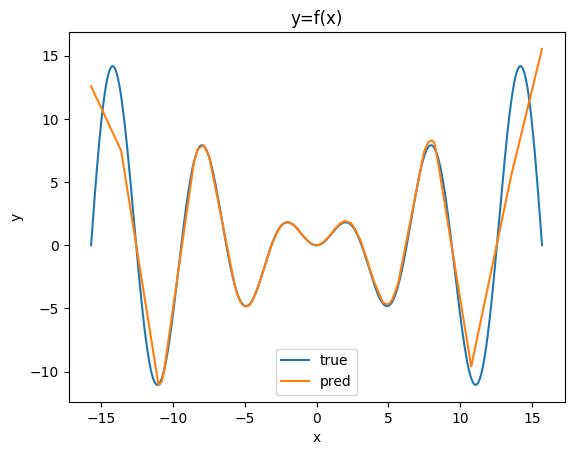

In [22]:
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x.detach().numpy(), y.detach().numpy(), label='true')
plt.plot(x.detach().numpy(), logits.detach().numpy(), label='pred')
plt.title('y=f(x)')
plt.legend()
plt.show()